In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the font family to serif
plt.rcParams['font.family'] = 'serif'

# Specify the preferred serif fonts
plt.rcParams['font.serif'] = ['Times New Roman']

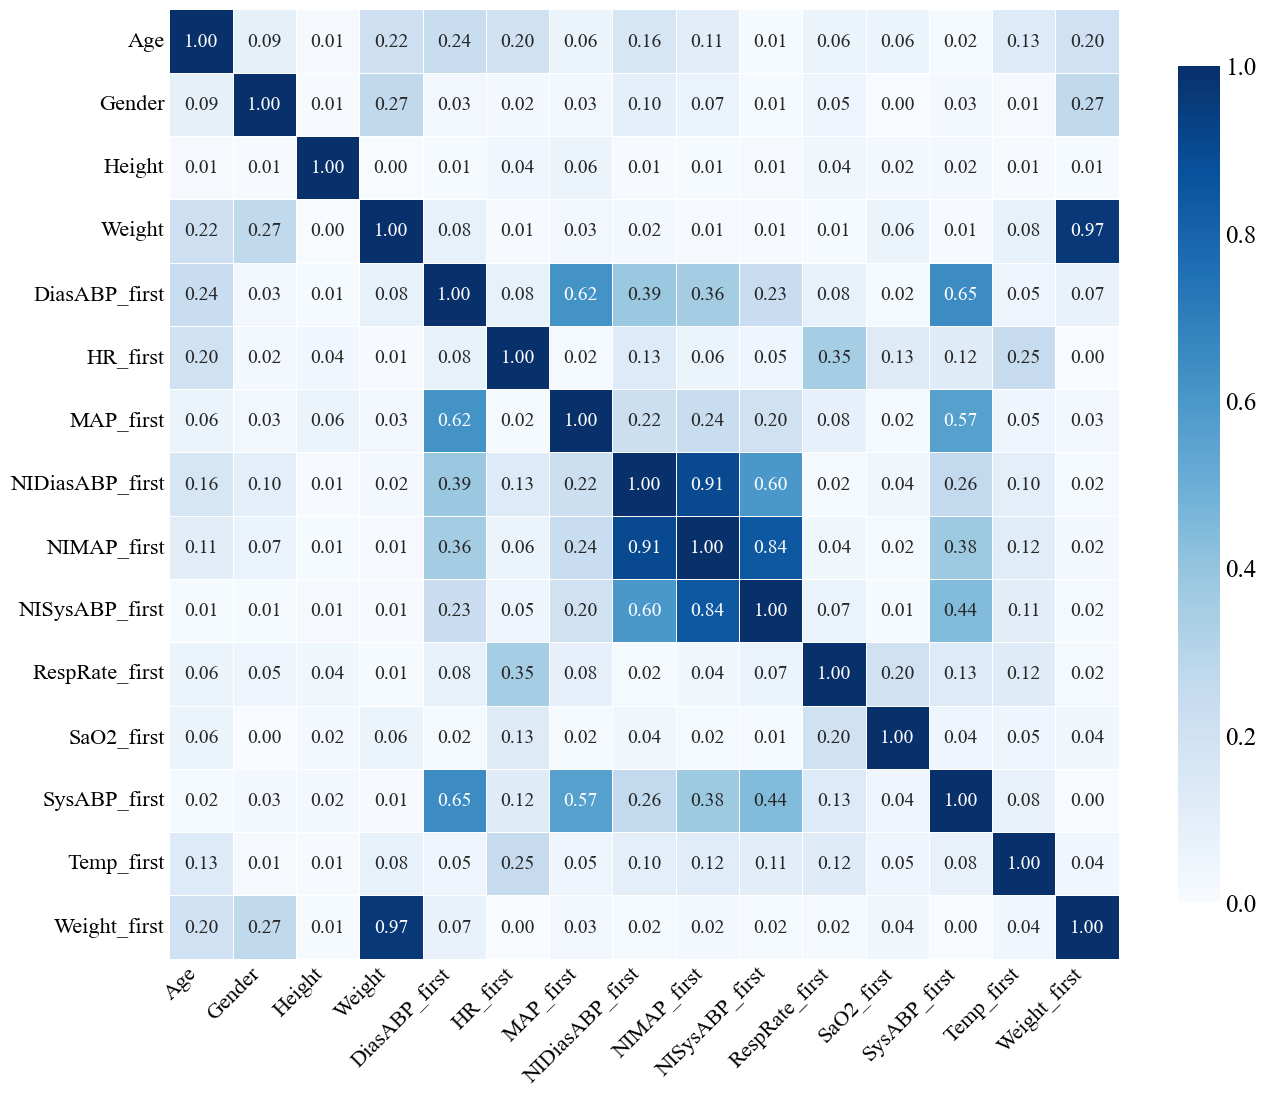

In [2]:
# Load the dataframe
df = pd.read_csv('results/correlation_matrix_pre_pruning.csv', index_col=0)

# Set the context to 'talk' for larger fonts suitable for presentations
sns.set_context("talk")

# Initialize the figure with a generous size
plt.figure(figsize=(14, 12))

# Create the heatmap
# 'RdBu_r' is a standard diverging colormap (Red-White-Blue)
# vmin=-1, vmax=1 ensures the neutral color (white) represents 0 correlation
ax = sns.heatmap(df, 
            annot=True,       # Show correlation coefficients
            fmt=".2f",        # Format to 2 decimal places
            cmap='Blues',    # Colormap
            vmin=0, vmax=1,  # Range of values
            square=True,      # Force square cells
            linewidths=.5,    # Grid lines for separation
            cbar_kws={"shrink": .8},
            annot_kws={"size": 14}) # Readable number size

# Adjust tick labels for readability
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(rotation=0, fontsize=16)

# Remove the tick marks on the main heatmap
ax.tick_params(axis='both', which='both', length=0)

# Access the colorbar object and remove its tick marks
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=18, size=0)

# Add a title
# plt.title('Features Correlation Matrix', fontsize=20, pad=20)

# Ensure layout is tight so labels aren't cut off
plt.tight_layout()

# Save the plot
plt.savefig('results/correlation_pre_pruning.png', dpi=300)

In [3]:
def save_missing_values_to_csv(raw_data_path, corr_matrix_path, output_csv_path):
    # 1. Load the correlation matrix to get the list of relevant features
    try:
        corr_df = pd.read_csv(corr_matrix_path, index_col=0)
        features_of_interest = corr_df.columns.tolist()
    except FileNotFoundError:
        print(f"Error: Could not find file {corr_matrix_path}")
        return

    # 2. Load the raw dataset
    try:
        raw_df = pd.read_csv(raw_data_path)
    except FileNotFoundError:
        print(f"Error: Could not find file {raw_data_path}")
        return

    # 3. Filter raw data to include only the features from the correlation matrix
    available_features = [col for col in features_of_interest if col in raw_df.columns]
    
    # 4. Calculate missing values and percentages
    df_subset = raw_df[available_features]
    total_rows = len(df_subset)
    
    # Create a DataFrame for the results
    missing_counts = df_subset.isnull().sum()
    missing_percentages = (missing_counts / total_rows) * 100
    
    results_df = pd.DataFrame({
        'Missing_Count': missing_counts,
        'Percentage': missing_percentages
    })

    # 5. Sort by percentage descending
    results_df = results_df.sort_values(by='Percentage', ascending=False)
    
    # Reset index to make 'Feature' a column
    results_df.reset_index(inplace=True)
    results_df.rename(columns={'index': 'Feature'}, inplace=True)

    # 6. Save to CSV
    results_df.to_csv(output_csv_path, index=False)
    print(f"Successfully saved missing values analysis to '{output_csv_path}'")
    print(f"Total rows in dataset: {total_rows}")



In [4]:
# File names
RAW_DATA_FILE = 'Dataset_ICU_Barbieri_Mollura.csv'
CORR_MATRIX_FILE = 'results/correlation_matrix_pre_pruning.csv'
OUTPUT_FILE = 'results/missing_values_analysis.csv'

save_missing_values_to_csv(RAW_DATA_FILE, CORR_MATRIX_FILE, OUTPUT_FILE)

Successfully saved missing values analysis to 'results/missing_values_analysis.csv'
Total rows in dataset: 6000


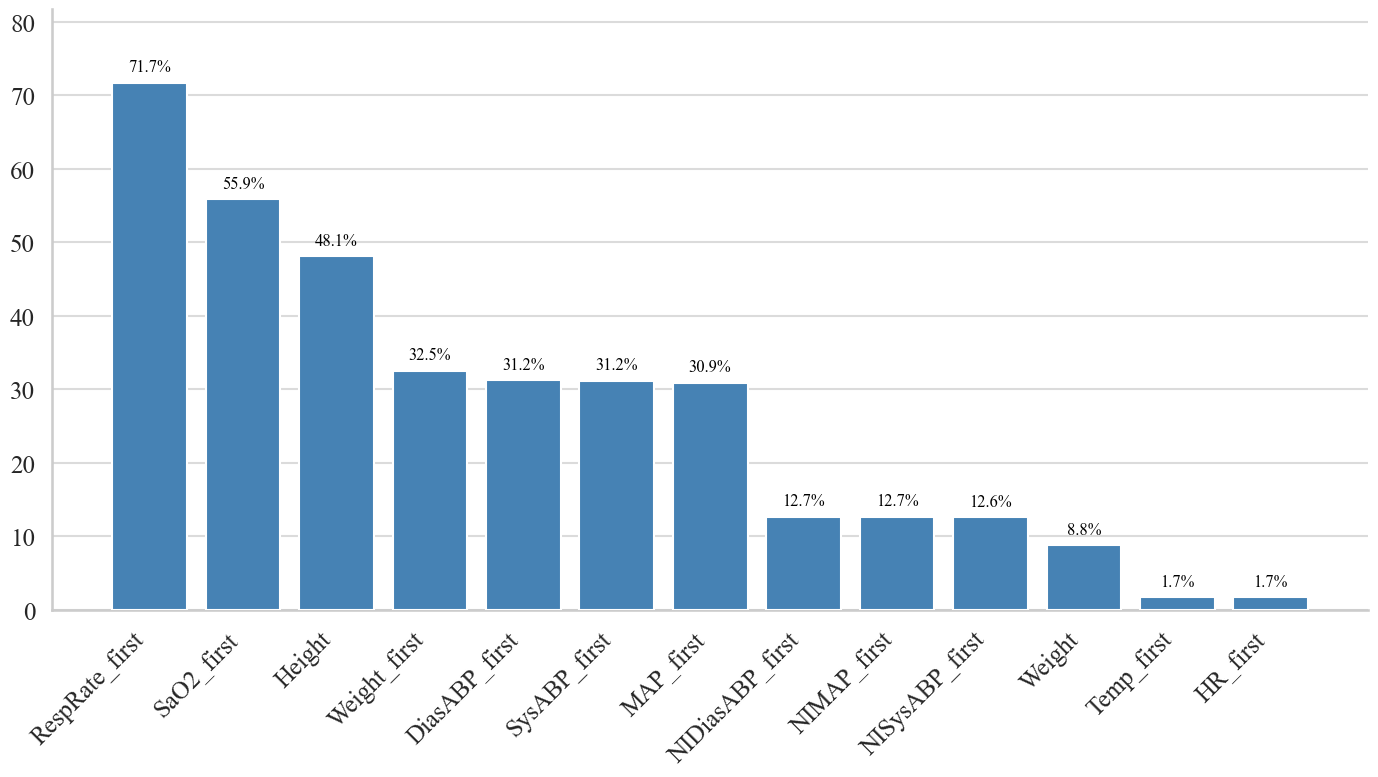

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 14

# Load the dataframe
try:
    df = pd.read_csv('missing_values_analysis.csv')
except FileNotFoundError:
    df = pd.read_csv('results/missing_values_analysis.csv')

# Sort data by percentage descending
df = df.sort_values('Percentage', ascending=False)

# Remove the last two rows (features with lowest missing values)
df = df.iloc[:-2]

# --- 3. Plotting ---
plt.figure(figsize=(14, 8))

# Create the bar chart
# zorder=3 places bars on top of the grid
bars = plt.bar(df['Feature'], df['Percentage'], color='steelblue', zorder=3)

# Titles and Labels
# plt.title('Percentage of Missing Values per Feature', fontsize=20, pad=20)
# plt.ylabel('Missing Values (%)', fontsize=16)
# plt.xlabel('Feature', fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=18)
plt.yticks(rotation=0, fontsize=18)

# Styling: Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Styling: Horizontal grid only
# axis='y' draws horizontal lines. We explicitly ensure vertical lines are off.
ax.grid(axis='y', linestyle='-', alpha=0.7, zorder=0)
ax.xaxis.grid(False) 

# Annotations
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 height + 1, 
                 f'{height:.1f}%', 
                 ha='center', va='bottom', fontsize=12, color='black')

# Adjust y-axis limit
plt.ylim(0, df['Percentage'].max() + 10)

# Final Layout
plt.tight_layout()

# Save
plt.savefig('results/missing_values_barplot_filtered.png', dpi=300)
plt.show()

Saved results/confusion_matrix_Phase_1_Decision_Tree.png
Saved results/confusion_matrix_Phase_1_Random_Forest.png
Saved results/confusion_matrix_Phase_1_k-Nearest_Neighbors.png
Saved results/confusion_matrix_Phase_1_Hist_Gradient_Boosting.png
Saved results/confusion_matrix_Phase_1_Logistic_Regression.png
Saved results/confusion_matrix_Phase_2_Baseline_Median.png
Saved results/confusion_matrix_Phase_2_BayesianRidge.png
Saved results/confusion_matrix_Phase_2_DecisionTree.png
Saved results/confusion_matrix_Phase_2_RandomForest.png
Saved results/confusion_matrix_Phase_2_ExtraTrees.png
Saved results/confusion_matrix_Phase_2_KNN.png


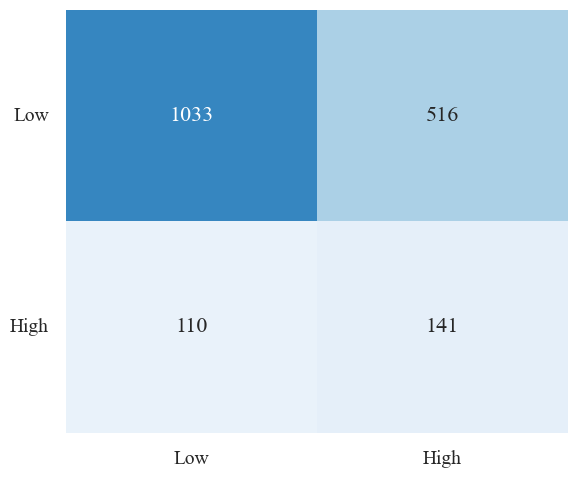

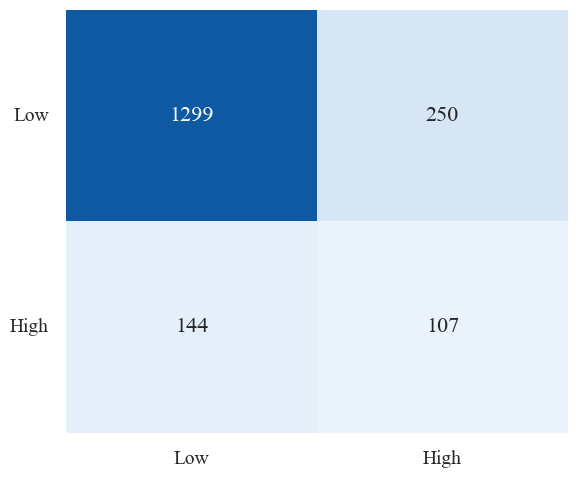

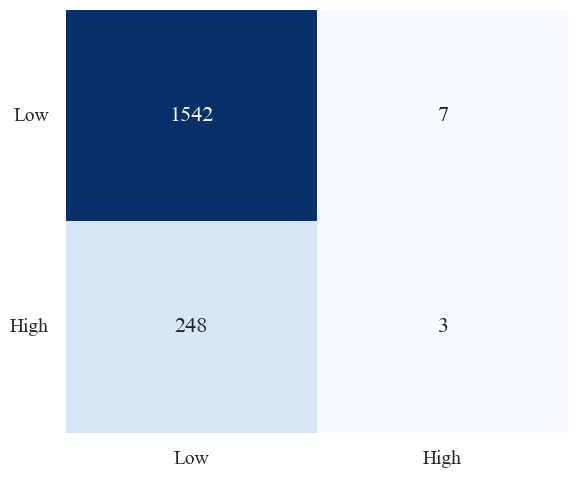

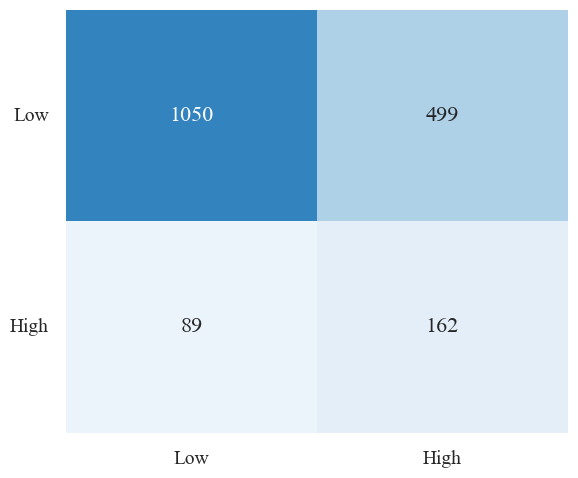

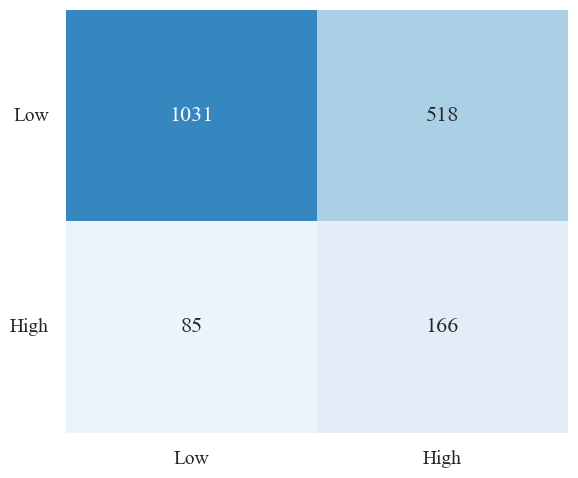

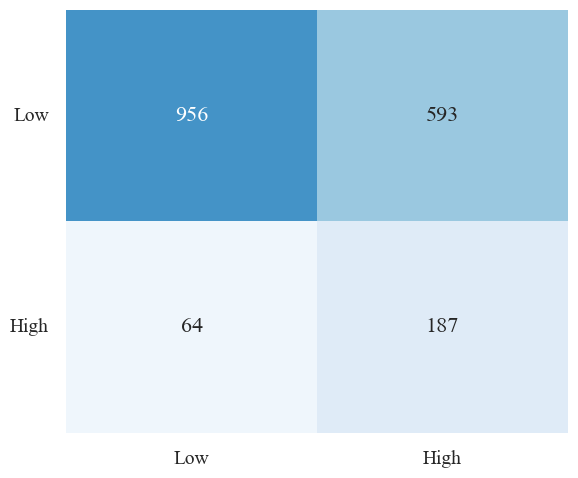

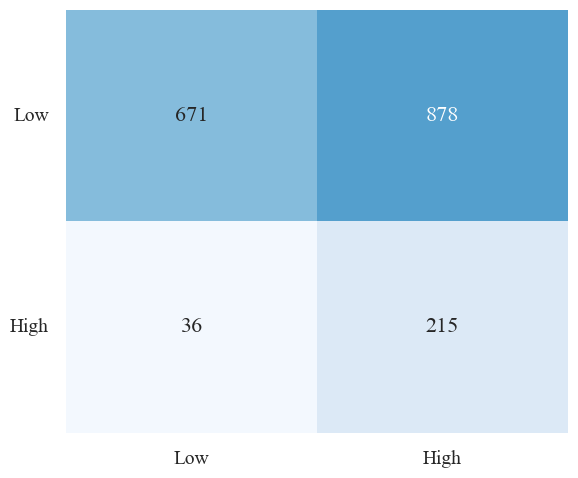

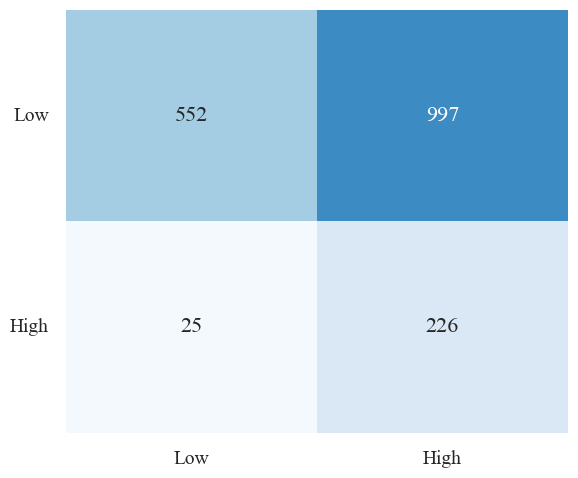

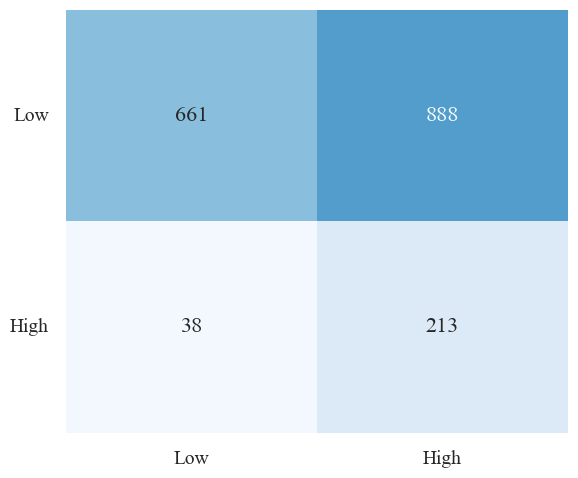

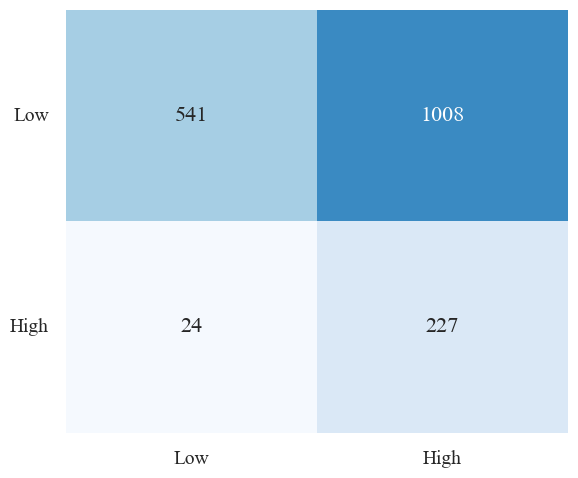

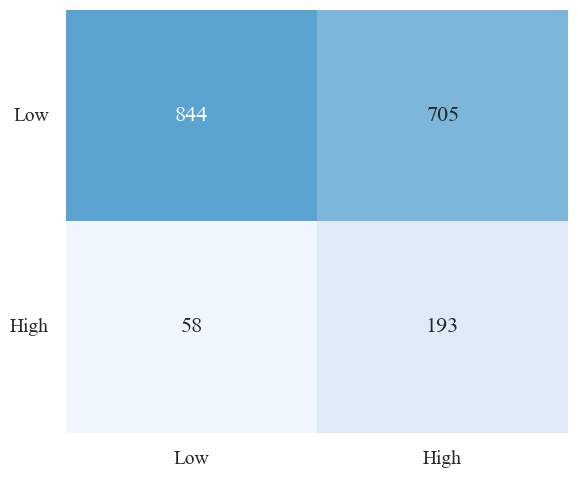

In [20]:
# --- 1. Set Font Configuration ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'DejaVu Serif']
plt.rcParams['font.size'] = 14

# --- 2. Load Data ---
try:
    df = pd.read_csv('confusion_matrices.csv')
except FileNotFoundError:
    df = pd.read_csv('results/confusion_matrices.csv')

# --- 3. Determine Global Scale ---
# Calculate the maximum value across all matrices to keep colors consistent
vmax = df[['TN', 'FP', 'FN', 'TP']].max().max()

# --- 4. Loop and Generate Separate Plots ---
for i, row in df.iterrows():
    # Create a clean filename
    model_name = row['Model'].replace(' ', '_').replace('(', '').replace(')', '')
    phase = row['Phase'].replace(' ', '_')
    filename = f"results/confusion_matrix_{phase}_{model_name}.png"
    
    # Initialize a new figure for each plot
    plt.figure(figsize=(6, 5))
    
    # Construct the confusion matrix
    cm = np.array([[row['TN'], row['FP']], 
                   [row['FN'], row['TP']]])
    
    # Plot Heatmap
    sns.heatmap(cm, 
                annot=True, 
                fmt='d',          # Integer formatting
                cmap='Blues',     # Color scheme
                vmin=0, vmax=vmax,# Fixed scale for coherence
                cbar=False,       # No colorbar
                annot_kws={"size": 16})
    
    # Titles and Labels
    # plt.title(f"{row['Model']}", fontsize=16, pad=15)
    # plt.ylabel('True Label', fontsize=18)
    # plt.xlabel('Predicted', fontsize=18)
    
    # Custom Tick Labels
    plt.xticks([0.5, 1.5], ['Low', 'High'], fontsize=14)
    plt.yticks([0.5, 1.5], ['Low', 'High'], fontsize=14, rotation=0)
    
    # Save
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    # plt.close() # Close figure to free memory

    print(f"Saved {filename}")